In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import time


In [ ]:
df = pd.read_csv('/content/rideshare_kaggle.csv')

In [ ]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142374,158fd991-03c2-42ea-8fcb-fa007d8a3265,1.545104e+09,3,18,12,2018-12-18 03:40:06,America/New_York,Beacon Hill,Fenway,Uber,...,0.0175,1.545066e+09,34.14,1.545044e+09,41.44,1.545077e+09,28.12,1.545044e+09,35.95,1.545077e+09
142375,1b41de35-5722-4546-81e4-6abc6c650210,1.545104e+09,3,18,12,2018-12-18 03:40:06,America/New_York,Beacon Hill,Fenway,Uber,...,0.0175,1.545066e+09,34.14,1.545044e+09,41.44,1.545077e+09,28.12,1.545044e+09,35.95,1.545077e+09
142376,28981e73-2a89-476f-8fe8-cadb69f3caad,1.543627e+09,1,1,12,2018-12-01 01:13:06,America/New_York,Beacon Hill,Fenway,Uber,...,0.0004,1.543594e+09,28.42,1.543579e+09,42.05,1.543601e+09,29.07,1.543579e+09,41.38,1.543601e+09
142377,4b8eb3f2-70d4-4f06-9258-b2f02bde09f8,1.543627e+09,1,1,12,2018-12-01 01:13:06,America/New_York,Beacon Hill,Fenway,Uber,...,0.0004,1.543594e+09,28.42,1.543579e+09,42.05,1.543601e+09,29.07,1.543579e+09,41.38,1.543601e+09


In [ ]:
df[['temperature','price','distance','surge_multiplier','humidity','windGust','visibility']].describe()

,temperature,price,distance,surge_multiplier,humidity,windGust,visibility
count,142379.000000,131080.000000,142379.000000,142379.000000,142379.000000,142379.000000,142379.000000
mean,39.560655,16.606375,2.204612,1.014614,0.740426,8.489504,8.473447
std,6.732089,9.370750,1.148468,0.093667,0.138672,5.276902,2.597177
min,18.910000,2.500000,0.020000,1.000000,0.380000,0.800000,0.717000
25%,36.500000,9.000000,1.300000,1.000000,0.640000,4.060000,8.432000
50%,40.490000,13.500000,2.170000,1.000000,0.710000,7.560000,9.880000
75%,43.580000,22.500000,2.950000,1.000000,0.880000,11.820000,9.996000
max,57.220000,92.000000,7.500000,3.000000,0.960000,27.250000,10.000000


In [ ]:
df.shape

(142379, 57)

In [ ]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          11299
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [ ]:
df.shape

(131079, 57)

In [ ]:
for i in df.columns:#removing white spaces from the columns
  df.rename(columns = {i:i.strip()},inplace=True)

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
#target Columns - Price

In [ ]:
df['timezone'].value_counts()#removing because does not make sense since only one Time Zone is available in the dataset

America/New_York    131079
Name: timezone, dtype: int64

In [ ]:
df['long_summary'].value_counts()#removing because this is just an extended version of the short summary

 Mostly cloudy throughout the day.                      38599
 Partly cloudy throughout the day.                      27445
 Light rain in the morning.                             19268
 Rain throughout the day.                               10025
 Light rain in the morning and overnight.                9467
 Rain until morning, starting again in the evening.      9364
 Foggy in the morning.                                   8519
 Light rain until evening.                               6521
 Overcast throughout the day.                            1405
 Possible drizzle in the morning.                         356
 Rain in the morning and afternoon.                       110
Name: long_summary, dtype: int64

In [ ]:
df['precipIntensity'].value_counts()#removing because intensity is varying very slightly giving trimmed data.

0.0000    102721
0.0020      1049
0.0005      1026
0.1058       835
0.0013       696
           ...  
0.0074       317
0.1044       310
0.0010       302
0.0006       297
0.0053       293
Name: precipIntensity, Length: 63, dtype: int64

In [ ]:
df['humidity'].value_counts()#removing because the values of the region has generally high humidity

0.69    7297
0.91    7009
0.70    6811
0.92    5615
0.71    5472
0.64    5001
0.93    4785
0.94    4433
0.65    4107
0.60    3844
0.88    3632
0.57    3531
0.73    3391
0.89    3145
0.72    3071
0.63    2667
0.79    2661
0.95    2466
0.90    2385
0.61    2372
0.85    2350
0.68    2288
0.58    2208
0.81    2199
0.78    2193
0.51    2178
0.54    2103
0.66    2086
0.67    2084
0.62    2082
0.96    2059
0.83    1892
0.52    1815
0.50    1779
0.77    1745
0.86    1701
0.74    1697
0.75    1606
0.84    1353
0.80    1330
0.55    1152
0.56    1136
0.46    1070
0.82    1068
0.87    1051
0.59    1041
0.53     675
0.44     629
0.41     351
0.40     345
0.38     118
Name: humidity, dtype: int64

In [ ]:
df['windSpeed'].value_counts()#not having any tremedously outlying value to have an impact on the price and surge multilplier

8.33    1782
8.11    1534
8.41    1495
4.54    1399
8.28    1320
        ... 
5.15      91
0.45      86
4.58      37
4.80      29
0.51      24
Name: windSpeed, Length: 291, dtype: int64

In [ ]:
df['windGust'].value_counts()#same reason as above

8.47     1410
12.38    1373
12.21    1178
11.54    1160
4.16     1087
         ... 
0.87       86
2.03       72
6.60       37
6.83       29
0.80       24
Name: windGust, Length: 286, dtype: int64

In [ ]:
df['temperatureHigh'].value_counts()#this data is not very much related to the pricing, since the temperature at the time of booking affects the pricing more

42.60    5413
42.61    5237
46.49    2880
42.18    2874
42.57    2868
         ... 
35.49     166
32.97     118
46.28      86
36.29      29
46.15      24
Name: temperatureHigh, Length: 129, dtype: int64

In [ ]:
df['icon'].value_counts()#is very similar to short summary

 cloudy                  41330
 partly-cloudy-night     30132
 partly-cloudy-day       21696
 rain                    19785
 clear-night             11639
 clear-day                4850
 fog                      1647
Name: icon, dtype: int64

In [ ]:
df['dewPoint'].value_counts()#not affecting the pricing and surge multilplier same with pressure as well

28.39    1630
30.16    1501
28.36    1162
30.30    1160
29.86    1040
         ... 
38.76      86
39.64      72
29.15      37
15.46      29
39.62      24
Name: dewPoint, Length: 313, dtype: int64

In [ ]:
df['windBearing'].value_counts()#does not add any value

303    3615
295    3153
297    3124
313    2470
294    2177
       ... 
104     297
19      290
91      178
248      91
88       72
Name: windBearing, Length: 195, dtype: int64

In [ ]:
df['cloudCover'].value_counts()#this as well does not affect the pricing

1.00    50669
0.00     7659
0.81     3774
0.77     3125
0.99     2607
        ...  
0.19      327
0.78      326
0.61      318
0.10      318
0.47      303
Name: cloudCover, Length: 83, dtype: int64

In [ ]:
#dropping columns that do not add value to the data 
trimmed_columns_df = df.drop(['id','timestamp','month','datetime','timezone','product_id',
                              'precipIntensity','precipProbability','windSpeed','apparentTemperature',
                              'long_summary','humidity','windGust','windGustTime','visibility',
                              'temperatureHigh','temperatureHighTime','temperatureLow',
                              'temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime'
                              ,'apparentTemperatureLow','apparentTemperatureLowTime','icon','dewPoint','pressure','windBearing',
                              'cloudCover','uvIndex','visibility.1',
                              'ozone','sunriseTime','sunsetTime','moonPhase','precipIntensityMax',
                              'uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime'
                              ,'apparentTemperatureMin','apparentTemperatureMinTime',
                              'apparentTemperatureMax','apparentTemperatureMaxTime'],axis=1)

In [ ]:
trimmed_columns_df

,hour,day,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary
0,9,16,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,Mostly Cloudy
1,2,27,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,Rain
2,1,28,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,Clear
3,4,30,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,Clear
4,3,29,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142371,3,18,Back Bay,North End,Uber,WAV,12.5,2.67,1.0,42.3519,-71.0551,37.26,Overcast
142373,3,18,South Station,Theatre District,Lyft,Lux Black XL,27.5,1.11,1.0,42.3519,-71.0551,37.26,Overcast
142374,3,18,Beacon Hill,Fenway,Uber,WAV,9.5,2.37,1.0,42.3519,-71.0551,37.26,Overcast
142375,3,18,Beacon Hill,Fenway,Uber,Black SUV,26.0,2.37,1.0,42.3519,-71.0551,37.26,Overcast


In [ ]:
revenue_df = trimmed_columns_df[['price','cab_type','distance']].groupby(by='cab_type').sum()
revenue_df['$ per mile'] = np.round(np.array(revenue_df['price']/revenue_df['distance']))
revenue_df

,price,distance,$ per mile
cab_type,,,
Lyft,1101738.2,139253.20,8.0
Uber,1075006.0,149722.24,7.0


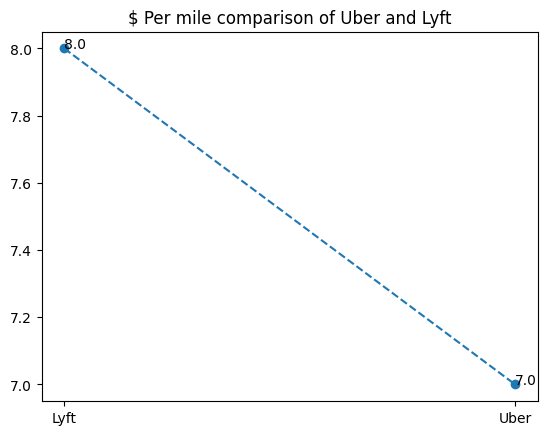

In [ ]:
fig, ax = plt.subplots()

ax.plot(revenue_df.index,revenue_df['$ per mile'],linestyle='--',marker = 'o')

plt.title('$ Per mile comparison of Uber and Lyft')

for i,v in zip(revenue_df.index,revenue_df['$ per mile']):
  plt.text(i,v,str(v))

plt.show()

In [ ]:
revenue_by_cab_type_df = trimmed_columns_df[['price','distance','cab_type','name']].groupby(by=['cab_type','name']).sum()
revenue_by_cab_type_df['$ per mile'] = np.round(np.array(revenue_by_cab_type_df['price']/revenue_by_cab_type_df['distance']),2)

In [ ]:
car_types = []
for i in revenue_by_cab_type_df.index:
  car_types.append(" - ".join(list(i)))

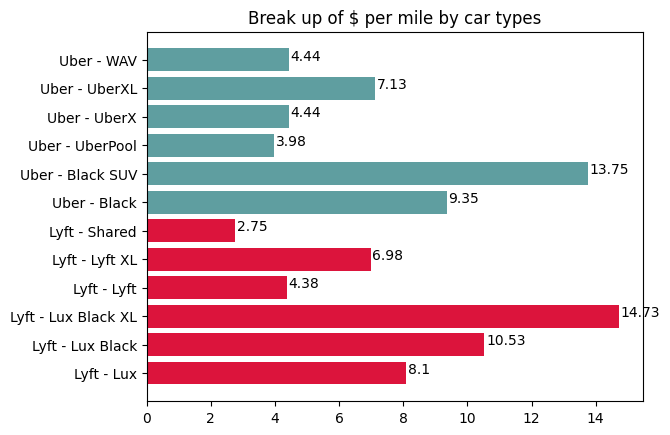

In [ ]:
colors = ['cadetblue' if 'Uber' in yi else 'crimson' for yi in car_types]

plt.barh(car_types,revenue_by_cab_type_df['$ per mile'],color=colors)

plt.title('Break up of $ per mile by car types')

for i, v in enumerate(list(revenue_by_cab_type_df['$ per mile'])):
    plt.text(v + 0.05, i , str(v))

plt.show()

In [ ]:
import folium

locations = dict(trimmed_columns_df[['latitude','longitude']].value_counts())

locations_list = []
for k,v in locations.items():
  new_tuple = k + (v,)
  locations_list.append(list(new_tuple))

map = folium.Map(location=[42.361145,  -71.057083], zoom_start=14)

for i in range(len(locations_list)):

  folium.Marker(location=locations_list[i][:2]).add_to(map)

map

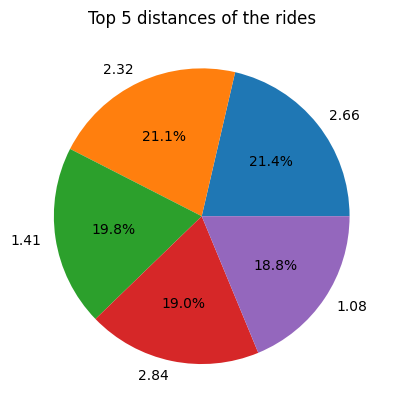

In [ ]:
distances = dict(trimmed_columns_df['distance'].value_counts())
distances_values = [str(i) for i in list(distances.keys())[:5]]

fig,ax = plt.subplots()

ax.pie(list(distances.values())[:5],labels=distances_values,autopct='%1.1f%%')

plt.title('Top 5 distances of the rides')

plt.show()

In [ ]:
print('Maximum Temperature during the timeline of the data is:',max(trimmed_columns_df['temperature']),'Fahrenheit')
print('Minimum Temperature during the timeline of the data is:',min(trimmed_columns_df['temperature']),'Fahrenheit')

Maximum Temperature during the timeline of the data is: 57.22 Fahrenheit
Minimum Temperature during the timeline of the data is: 18.91 Fahrenheit


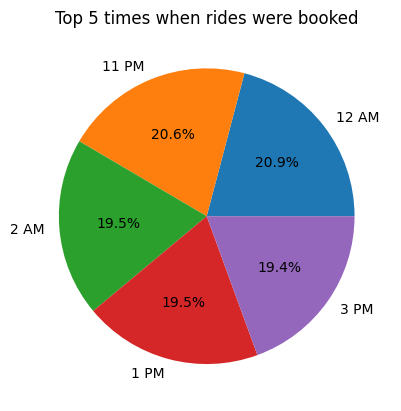

In [ ]:
time = dict(trimmed_columns_df['hour'].value_counts())

time_values = []
for i in time.keys():
  if i > 12:
    time_values.append(str(i-12) + ' PM')
  elif i == 12:
    time_values.append(str(i) + ' PM')
  elif i < 12 and i !=0 :
    time_values.append(str(i) + ' AM')
  elif i == 0:
    time_values.append(str(12) + ' AM')

fig,ax = plt.subplots()

ax.pie(list(time.values())[:5],labels=time_values[:5],autopct='%1.1f%%')

plt.title('Top 5 times when rides were booked')

plt.show()

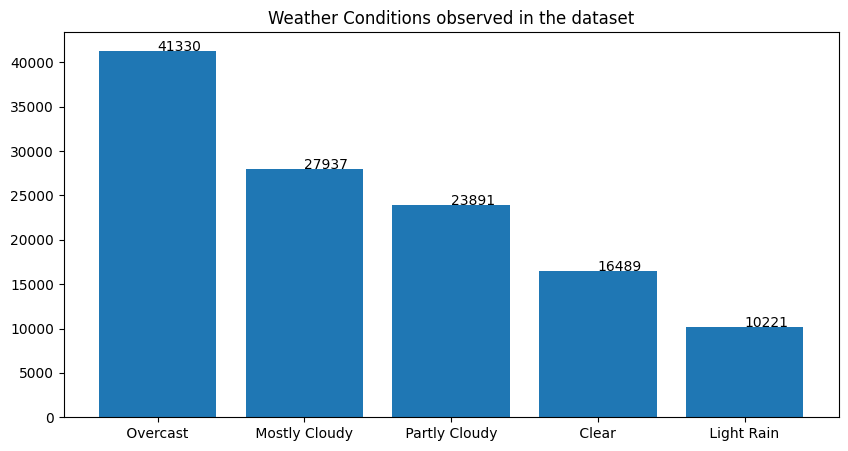

In [ ]:
weather = dict(trimmed_columns_df['short_summary'].value_counts())

fig,ax = plt.subplots(figsize=(10,5))

ax.bar(list(weather.keys())[:5], list(weather.values())[:5])

plt.title('Weather Conditions observed in the dataset')

for i, v in enumerate(list(weather.values())[:5]):
    plt.text( i ,v+0.05 , str(v))

plt.show()

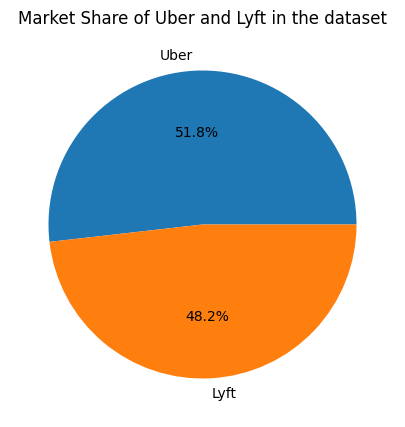

In [ ]:
cab = dict(trimmed_columns_df['cab_type'].value_counts())

fig,ax = plt.subplots(figsize=(10,5))

ax.pie(list(cab.values()),labels=list(cab.keys()),autopct='%1.1f%%')

plt.title('Market Share of Uber and Lyft in the dataset')

plt.show()

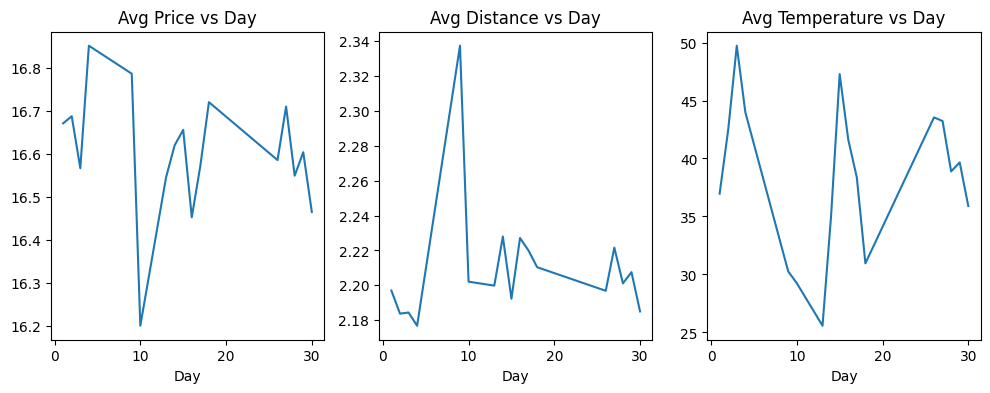

In [ ]:
sample = trimmed_columns_df[['day','price','distance','temperature']].groupby('day').mean()

sample.reset_index(inplace=True)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=True,figsize=(12,4))

ax1.plot(sample['day'],sample['price'])
ax1.set_title('Avg Price vs Day')
ax1.set_xlabel('Day')

ax2.plot(sample['day'],sample['distance'])
ax2.set_title('Avg Distance vs Day')
ax2.set_xlabel('Day')

ax3.plot(sample['day'],sample['temperature'])
ax3.set_title('Avg Temperature vs Day')
ax3.set_xlabel('Day')

plt.show()

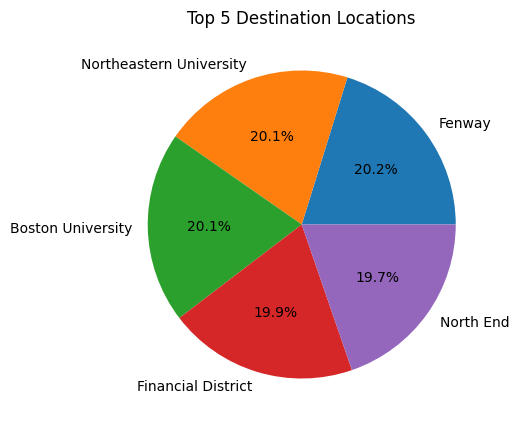

In [ ]:
destination = dict(trimmed_columns_df['destination'].value_counts())

fig,ax = plt.subplots(figsize=(10,5))

ax.pie(list(destination.values())[:5],labels=list(destination.keys())[:5],autopct='%1.1f%%')

plt.title('Top 5 Destination Locations')

plt.show()

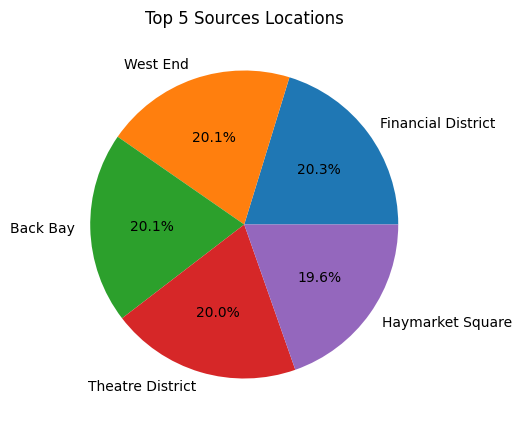

In [ ]:
source = dict(trimmed_columns_df['source'].value_counts())

fig,ax = plt.subplots(figsize=(10,5))

ax.pie(list(source.values())[:5],labels=list(source.keys())[:5],autopct='%1.1f%%')

plt.title('Top 5 Sources Locations')

plt.show()

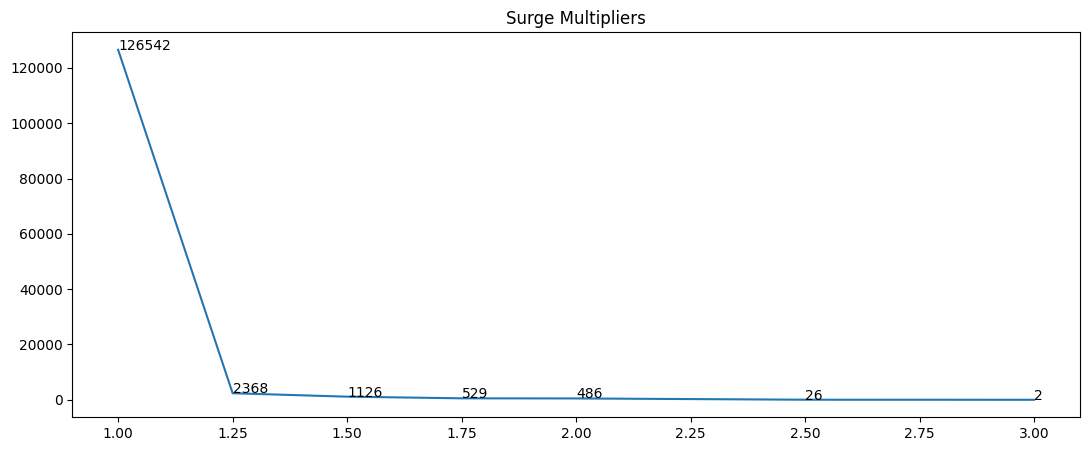

In [ ]:
surge_multiplier = dict(trimmed_columns_df['surge_multiplier'].value_counts())

fig,ax = plt.subplots(figsize=(13,5))

ax.plot(list(surge_multiplier.keys()),list(surge_multiplier.values()))

plt.title('Surge Multipliers')

for i, v in surge_multiplier.items():
    plt.text( i,v+0.05, str(v))

In [ ]:
routes = []
for i,j in zip(trimmed_columns_df['source'],trimmed_columns_df['destination']):
  routes.append(str(i) + ' -> ' + str(j))

routes = pd.Series(routes,index=trimmed_columns_df.index)

trimmed_columns_df['routes'] = routes

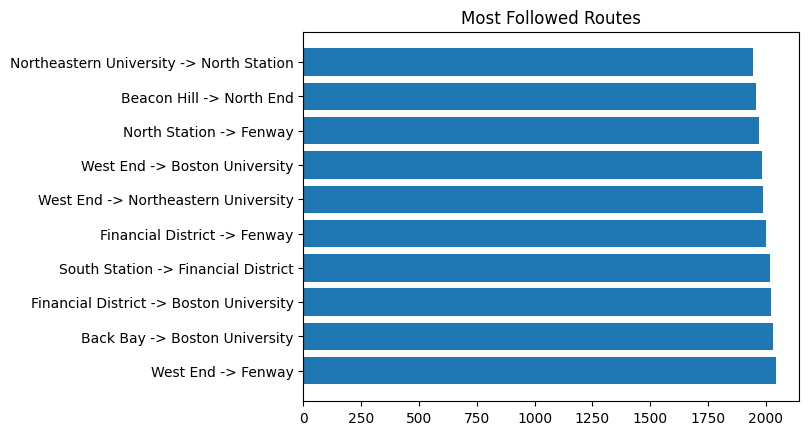

In [ ]:
route = dict(trimmed_columns_df['routes'].value_counts()[:10])

plt.barh(list(route.keys()),list(route.values()))

plt.title('Most Followed Routes')

plt.show()

In [ ]:
most_surge_multiplied = trimmed_columns_df[trimmed_columns_df['surge_multiplier'] == 3]

In [ ]:
most_surge_multiplied.groupby(by='cab_type').count()

,hour,day,source,destination,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,routes
cab_type,,,,,,,,,,,,,
Lyft,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
most_surge_multiplied[most_surge_multiplied['destination'] == 'Boston University']

,hour,day,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,routes
71555,22,27,Theatre District,Boston University,Lyft,Lyft XL,62.5,4.64,3.0,42.3519,-71.0643,40.88,Partly Cloudy,Theatre District -> Boston University
71556,23,16,Theatre District,Boston University,Lyft,Lyft,38.0,4.64,3.0,42.3647,-71.0542,41.29,Light Rain,Theatre District -> Boston University


In [ ]:
most_surge_multiplied[most_surge_multiplied['source'] == 'Back Bay']

,hour,day,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,routes


In [ ]:



# compute the correlation matrix between all features and the target variable
corr_matrix = df.corr()['price']

# print the correlation values in descending order
print(corr_matrix.sort_values(ascending=False))


variance = df.var()

# print the variance of each feature in descending order
print('\n',variance.sort_values(ascending=False))

price                          1.000000
distance                       0.346452
surge_multiplier               0.244445
latitude                       0.005181
cloudCover                     0.004451
windGust                       0.003448
windBearing                    0.003202
humidity                       0.002918
windSpeed                      0.002813
dewPoint                       0.002784
precipIntensityMax             0.001896
moonPhase                      0.001784
temperature                    0.001539
apparentTemperatureMax         0.001141
apparentTemperature            0.001066
apparentTemperatureLow         0.001050
month                          0.001016
hour                           0.000946
uvIndex                        0.000823
apparentTemperatureHigh        0.000745
precipIntensity                0.000718
temperatureMax                 0.000576
precipProbability              0.000460
temperatureMin                 0.000398
temperatureHigh                0.000316


<ipython-input-52-13daf803f277>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()


In [ ]:
df = df.drop(['id','timestamp','month','datetime','timezone','product_id',
                              'precipIntensity','precipProbability',
                              'long_summary','windGust','windGustTime',
                              'temperatureHigh','temperatureHighTime','temperatureLow',
                              'temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime'
                              ,'apparentTemperatureLow','apparentTemperatureLowTime','icon','dewPoint','pressure','windBearing','uvIndex','visibility.1',
                              'ozone','sunriseTime','sunsetTime','moonPhase','precipIntensityMax',
                              'uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime'
                              ,'apparentTemperatureMin','apparentTemperatureMinTime',
                              'apparentTemperatureMax','latitude','longitude','apparentTemperatureMaxTime'],axis=1)

In [ ]:
df['price_per_mile'] = df['price']/df['distance']
df.head()

,hour,day,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,humidity,windSpeed,visibility,cloudCover,price_per_mile
0,9,16,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.68,8.66,10.000,0.72,11.363636
1,2,27,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.94,11.98,4.786,1.00,25.000000
2,1,28,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.75,7.33,10.000,0.03,15.909091
3,4,30,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.73,5.28,10.000,0.00,59.090909
4,3,29,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.70,9.14,10.000,0.44,20.454545


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import SplineTransformer
import time

start_time = time.time()
y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use cross-validation to evaluate the model on the training data
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -1 * cv_scores.mean()
print("Cross-validation | Linear Regression | Mean Squared Error:", cv_mse)

end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Linear Regression | Mean Squared Error: 6.219994277414509
The code took 28.66 seconds to run.


In [ ]:
from sklearn.linear_model import LassoLarsCV
from sklearn.preprocessing import StandardScaler
import time

start_time = time.time()
y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

standardizeVarTransformer = StandardScaler()
X_standardized = standardizeVarTransformer.fit_transform(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Fit a LassoLarsCV model to the data using AIC-based model selection
lars_model = LassoLarsCV(max_iter=100, eps=0.0001, n_jobs=-1)
lars_model.fit(X_train, y_train)

cv_scores_lass = cross_val_score(lars_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_lass = -1 * cv_scores_lass.mean()
print("Cross-validation | Lasso from LARS with Shrinkage Parameter:",lars_model.alpha_," | Mean Squared Error:", cv_mse_lass)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Lasso from LARS with Shrinkage Parameter: 0.00025430621919601354  | Mean Squared Error: 6.220017451778323
The code took 50.35 seconds to run.


In [ ]:
import time

start_time = time.time()
y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

regTree = DecisionTreeRegressor(min_samples_leaf = 5)
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

regTree.fit(X_train, y_train)

cv_scores_regTree = cross_val_score(regTree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_regTree = -1 * cv_scores_regTree.mean()
print("Cross-validation | Regression Tree | Mean Squared Error:", cv_mse_regTree)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Regression Tree | Mean Squared Error: 0.05675157956332193
The code took 40.13 seconds to run.


In [ ]:
import time


start_time = time.time()
splineFeaturesList = ['hour','surge_multiplier','distance','apparentTemperature','price_per_mile']
DataSplineTransformer = SplineTransformer(n_knots = 5, degree = 3, knots = "quantile")
convertedSplineFeatures = DataSplineTransformer.fit_transform(df[splineFeaturesList])

X_num = df[['temperature','humidity','windSpeed','visibility','cloudCover',]]

categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedSplineFeatures, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
lr_model_spline = LinearRegression()
lr_model_spline.fit(X_train, y_train)

# Use cross-validation to evaluate the model on the training data
cv_scores_lr_spline = cross_val_score(lr_model_spline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_lr_spline = -1 * cv_scores_lr_spline.mean()
print("Cross-validation | Linear Regression with Spline Vars =",splineFeaturesList ," | Mean Squared Error:", cv_mse_lr_spline)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Linear Regression with Spline Vars = ['hour', 'surge_multiplier', 'distance', 'apparentTemperature', 'price_per_mile']  | Mean Squared Error: 3.179434736635278
The code took 39.38 seconds to run.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time

start_time = time.time()
y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

randomForestReg = RandomForestRegressor(n_estimators = 10)
randomForestReg.fit(X_train, y_train)

cv_scores_ranfor = cross_val_score(randomForestReg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ranfor = -1 * cv_scores_ranfor.mean()

print("Cross-validation | Random Forest Regression with 10 trees | Mean Squared Error:", cv_mse_ranfor)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Random Forest Regression with 10 trees | Mean Squared Error: 0.02934189801981072
The code took 237.38 seconds to run.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time


start_time = time.time()
y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

randomForestReg = RandomForestRegressor(n_estimators = 30)
randomForestReg.fit(X_train, y_train)

cv_scores_ranfor = cross_val_score(randomForestReg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ranfor = -1 * cv_scores_ranfor.mean()

print("Cross-validation | Random Forest Regression with 30 trees | Mean Squared Error:", cv_mse_ranfor)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Random Forest Regression with 30 trees | Mean Squared Error: 0.0236230381295251
The code took 753.58 seconds to run.


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import time

start_time = time.time()

y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

regTreeADA = DecisionTreeRegressor(min_samples_leaf = 5)

AdaBoostedTree = AdaBoostRegressor(estimator = regTreeADA, n_estimators = 10, learning_rate = 0.5)
AdaBoostedTree.fit(X_train, y_train)

cv_scores_ADA = cross_val_score(AdaBoostedTree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ADA = -1 * cv_scores_ADA.mean()

print("Cross-validation | ADA Boosting with Decision Tree Regressor with learning rate = 0.5, Estimators = 10, min_samples_leaf = 5 | Mean Squared Error:", cv_mse_ADA)

end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | ADA Boosting with Decision Tree Regressor with learning rate = 0.5, Estimators = 10, min_samples_leaf = 5 | Mean Squared Error: 0.03027440654800597
The code took 437.58 seconds to run.


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import time


start_time = time.time()
y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

regTreeADA = DecisionTreeRegressor(min_samples_leaf = 5)

AdaBoostedTree = AdaBoostRegressor(estimator = regTreeADA, n_estimators = 30, learning_rate = 0.5)
AdaBoostedTree.fit(X_train, y_train)

cv_scores_ADA = cross_val_score(AdaBoostedTree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ADA = -1 * cv_scores_ADA.mean()

print("Cross-validation | ADA Boosting with Decision Tree Regressor with learning rate = 0.5, Estimators = 30, max_depth = 5 | Mean Squared Error:", cv_mse_ADA)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | ADA Boosting with Decision Tree Regressor with learning rate = 0.5, Estimators = 30, max_depth = 5 | Mean Squared Error: 0.03918432381361202
The code took 1437.72 seconds to run.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import time


start_time = time.time()

y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

gradientBoostingReg = GradientBoostingRegressor(loss = "squared_error", n_estimators = 10, learning_rate = 0.3, subsample = 0.5)
gradientBoostingReg.fit(X_train, y_train)

cv_scores_GB = cross_val_score(gradientBoostingReg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_GB = -1 * cv_scores_GB.mean()

print("Cross-validation | Gradient Boosting withLoss Function 'squared_error' with learning rate = 0.3, Estimators = 100, sub_sampling = 50% | Mean Squared Error:", cv_mse_GB)
end_time = time.time()
elapsed_time = end_time - start_time


print(f"The code took {elapsed_time:.2f} seconds to run.")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-validation | Gradient Boosting withLoss Function 'squared_error' with learning rate = 0.3, Estimators = 100, sub_sampling = 50% | Mean Squared Error: 4.247260190913337
The code took 69.43 seconds to run.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import r2_score



y = df['price']
categoricalFeaturesList = ['day','source','destination','cab_type','name','short_summary']
X_num = df[['hour','distance','surge_multiplier','temperature','apparentTemperature','humidity','windSpeed','visibility','cloudCover','price_per_mile']]

categoricalVarTransformer = OneHotEncoder(sparse = False)
convertedCategoricalVars = categoricalVarTransformer.fit_transform(df[categoricalFeaturesList])

X_all = np.hstack([X_num, convertedCategoricalVars])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

randomForestReg_test = RandomForestRegressor(n_estimators = 30)
randomForestReg_test.fit(X_train, y_train)

cv_scores_ranfor = cross_val_score(randomForestReg_test, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ranfor = -1 * cv_scores_ranfor.mean()

print("\nCross-validation | Random Forest Regression with 30 trees | Mean Squared Error:", cv_mse_ranfor)

y_pred = randomForestReg_test.predict(X_test)

score = r2_score(y_test, y_pred)
print("\nR-squared score:", score)



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Cross-validation | Random Forest Regression with 30 trees | Mean Squared Error: 0.024810283139591705

R-squared score: 0.9997938383046466
